## Naive Bayes Classifier 

In [1161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [1163]:
df=pd.read_csv("adult_with_headers (1) (1).csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1165]:
df.sample(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11891,43,Private,177083,Some-college,10,Divorced,Tech-support,Unmarried,White,Female,0,0,30,United-States,<=50K
3270,73,Private,123160,10th,6,Widowed,Other-service,Not-in-family,White,Female,0,0,10,United-States,<=50K
14280,21,?,145964,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
1494,27,Private,23940,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
20497,65,Self-emp-not-inc,145628,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
24624,40,Private,88368,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,914,0,40,United-States,<=50K
13162,34,Private,250724,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,Jamaica,<=50K
22736,34,State-gov,112062,Masters,14,Never-married,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
12309,22,Private,218215,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
30171,45,Private,80430,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [1167]:
df.shape

(32561, 15)

In [1169]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [1171]:
import warnings 
warnings.filterwarnings("ignore")

In [1173]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [1175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1177]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [1179]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


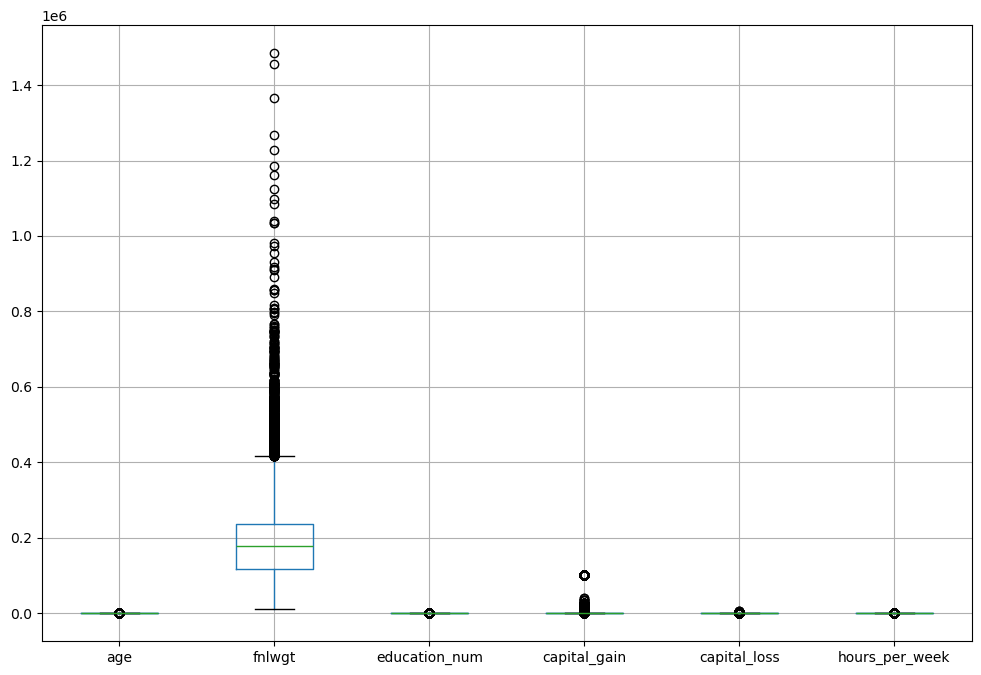

In [1181]:
df.boxplot(figsize=(12,8))
plt.show()

In [1211]:
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fnlwgt'] >= (Q1 - 1.5 * IQR)) & (df['fnlwgt'] <= (Q3 + 1.5 * IQR))]

In [1213]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['age'] >= (Q1 - 1.5 * IQR)) & (df['age'] <= (Q3 + 1.5 * IQR))]

In [1215]:
Q1 = df['education_num'].quantile(0.25)
Q3 = df['education_num'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['education_num'] >= (Q1 - 1.5 * IQR)) & (df['education_num'] <= (Q3 + 1.5 * IQR))]

In [1217]:
Q1 = df['capital_gain'].quantile(0.25)
Q3 = df['capital_gain'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['capital_gain'] >= (Q1 - 1.5 * IQR)) & (df['capital_gain'] <= (Q3 + 1.5 * IQR))]

In [1219]:
Q1 = df['capital_loss'].quantile(0.25)
Q3 = df['capital_loss'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['capital_loss'] >= (Q1 - 1.5 * IQR)) & (df['capital_loss'] <= (Q3 + 1.5 * IQR))]

In [1221]:
Q1 = df['hours_per_week'].quantile(0.25)
Q3 = df['hours_per_week'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['hours_per_week'] >= (Q1 - 1.5 * IQR)) & (df['hours_per_week'] <= (Q3 + 1.5 * IQR))]

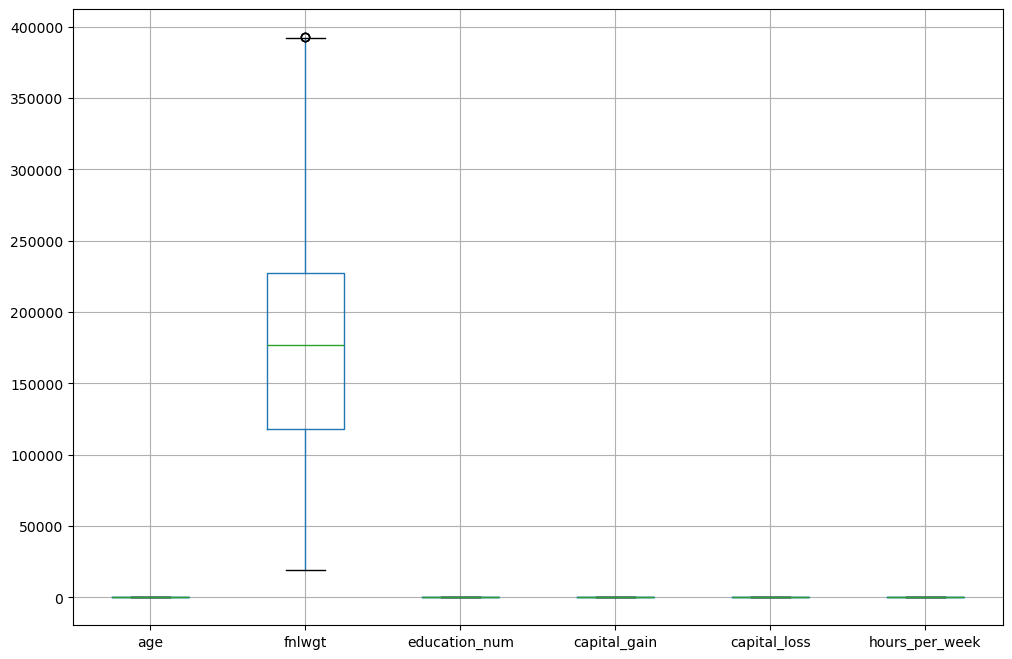

In [1223]:
df.boxplot(figsize=(12,8))
plt.show()

In [1225]:
categorical = [var for var in df if df[var].dtype=='O']  
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [1227]:
categorical_col=df[categorical].drop(["income"], axis=1)
categorical_col

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
11,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
...,...,...,...,...,...,...,...,...
32551,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,United-States
32554,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
32555,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States


In [1229]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [1231]:
for var in categorical:
    
   print(df[var].value_counts())

workclass
Private             8781
Local-gov            840
State-gov            523
Federal-gov          522
?                    512
Self-emp-not-inc     472
Self-emp-inc         192
Never-worked           2
Without-pay            1
Name: count, dtype: int64
education
HS-grad         4748
Some-college    2744
Bachelors       1851
Assoc-voc        613
Masters          506
11th             427
Assoc-acdm       408
10th             378
12th             170
Name: count, dtype: int64
marital_status
Married-civ-spouse       5133
Never-married            3993
Divorced                 1852
Separated                 408
Widowed                   292
Married-spouse-absent     159
Married-AF-spouse           8
Name: count, dtype: int64
occupation
Craft-repair         1886
Adm-clerical         1823
Exec-managerial      1275
Prof-specialty       1202
Other-service        1042
Machine-op-inspct    1028
Sales                 965
Handlers-cleaners     592
Transport-moving      550
?                 

In [1233]:
df.workclass.unique()

array([' Private', ' State-gov', ' Local-gov', ' Federal-gov',
       ' Self-emp-not-inc', ' ?', ' Self-emp-inc', ' Never-worked',
       ' Without-pay'], dtype=object)

In [1235]:
df.workclass.nunique()

9

In [1237]:
df.education.unique()

array([' HS-grad', ' 11th', ' Bachelors', ' Masters', ' Assoc-voc',
       ' Some-college', ' Assoc-acdm', ' 10th', ' 12th'], dtype=object)

In [1239]:
df.marital_status.unique()

array([' Divorced', ' Married-civ-spouse', ' Never-married', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [1241]:
df.occupation.unique()

array([' Handlers-cleaners', ' Prof-specialty', ' Exec-managerial',
       ' Craft-repair', ' Machine-op-inspct', ' Tech-support',
       ' Adm-clerical', ' Other-service', ' Transport-moving', ' ?',
       ' Sales', ' Protective-serv', ' Farming-fishing', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [1243]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Unmarried', ' Own-child',
       ' Other-relative'], dtype=object)

In [1245]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [1247]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [1249]:
df.native_country.unique()

array([' United-States', ' Cuba', ' India', ' ?', ' Puerto-Rico',
       ' Mexico', ' England', ' Germany', ' Iran', ' Philippines',
       ' Italy', ' Cambodia', ' Laos', ' Poland', ' Portugal', ' Jamaica',
       ' Haiti', ' Canada', ' Japan', ' Dominican-Republic', ' Peru',
       ' China', ' Trinadad&Tobago', ' El-Salvador', ' Greece',
       ' Nicaragua', ' Guatemala', ' Taiwan', ' Vietnam', ' Hong',
       ' Ireland', ' South', ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)',
       ' France', ' Columbia', ' Honduras', ' Ecuador', ' Scotland',
       ' Hungary', ' Thailand'], dtype=object)

In [1251]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [1253]:
df.workclass.value_counts()

workclass
Private             8781
Local-gov            840
State-gov            523
Federal-gov          522
?                    512
Self-emp-not-inc     472
Self-emp-inc         192
Never-worked           2
Without-pay            1
Name: count, dtype: int64

In [1255]:
df["workclass"].replace(' ?', np.NaN, inplace=True)

In [1257]:
df.workclass.value_counts()

workclass
Private             8781
Local-gov            840
State-gov            523
Federal-gov          522
Self-emp-not-inc     472
Self-emp-inc         192
Never-worked           2
Without-pay            1
Name: count, dtype: int64

In [1259]:
print(type('workclass'))

<class 'str'>


In [1261]:
df["native_country"].replace(' ?', np.NaN, inplace=True)

In [1263]:
df.native_country.value_counts()

native_country
United-States                 10702
Mexico                          138
Philippines                     105
Puerto-Rico                      46
Germany                          46
Cuba                             41
Canada                           39
Jamaica                          37
Vietnam                          35
India                            31
Poland                           30
England                          29
Columbia                         28
Italy                            27
China                            26
Dominican-Republic               24
Japan                            23
South                            23
El-Salvador                      23
Guatemala                        15
Portugal                         13
Haiti                            12
Iran                             12
Taiwan                           12
Hong                             11
Cambodia                         11
Nicaragua                        11
Peru         

In [1265]:
df[categorical].isnull().sum()

workclass         512
education           0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
native_country    207
income              0
dtype: int64

In [1267]:
df["workclass"].isnull().sum()

512

In [1269]:
df["workclass"].fillna("Unknown", inplace=True)

In [1271]:
df["workclass"].isnull().sum()

0

In [1273]:
df[categorical].isnull().sum()

workclass           0
education           0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
native_country    207
income              0
dtype: int64

In [1275]:
df["native_country"].isnull().sum()

207

In [1277]:
df["native_country"].fillna("Unknown", inplace=True)

In [1279]:
df["native_country"].isnull().sum()

0

In [1281]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [1283]:
z=df.corr(numeric_only=True)
z

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.055873,0.027027,NaN,NaN,NaN
fnlwgt,-0.055873,1.000000,-0.024054,NaN,NaN,NaN
education_num,0.027027,-0.024054,1.000000,NaN,NaN,NaN
capital_gain,NaN,NaN,NaN,NaN,NaN,NaN
capital_loss,NaN,NaN,NaN,NaN,NaN,NaN
hours_per_week,NaN,NaN,NaN,NaN,NaN,NaN


In [1285]:
numeric_col = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
numeric_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [1287]:
df[numeric_col].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [1306]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [1308]:
# Converting categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native_country']=le.fit_transform(df['native_country'])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2,38,3,215646,6,9,0,6,1,4,1,0,0,40,37,<=50K
3,53,3,234721,1,7,2,6,0,2,1,0,0,40,37,<=50K
4,28,3,338409,5,13,2,10,5,2,0,0,0,40,4,<=50K
5,37,3,284582,7,14,2,4,5,4,0,0,0,40,37,<=50K
11,30,6,141297,5,13,2,10,0,1,1,0,0,40,17,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,32,3,34066,0,6,2,6,0,0,1,0,0,40,37,<=50K
32554,53,3,321865,7,14,2,4,0,4,1,0,0,40,37,>50K
32555,22,3,310152,8,10,4,11,1,4,1,0,0,40,37,<=50K
32557,40,3,154374,6,9,2,7,0,4,1,0,0,40,37,>50K


## Feature Extraction

In [1310]:
x=df.drop(['income'], axis=1)
x

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
2,38,3,215646,6,9,0,6,1,4,1,0,0,40,37
3,53,3,234721,1,7,2,6,0,2,1,0,0,40,37
4,28,3,338409,5,13,2,10,5,2,0,0,0,40,4
5,37,3,284582,7,14,2,4,5,4,0,0,0,40,37
11,30,6,141297,5,13,2,10,0,1,1,0,0,40,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,32,3,34066,0,6,2,6,0,0,1,0,0,40,37
32554,53,3,321865,7,14,2,4,0,4,1,0,0,40,37
32555,22,3,310152,8,10,4,11,1,4,1,0,0,40,37
32557,40,3,154374,6,9,2,7,0,4,1,0,0,40,37


In [1312]:
y=df['income']
y

2         <=50K
3         <=50K
4         <=50K
5         <=50K
11         >50K
          ...  
32551     <=50K
32554      >50K
32555     <=50K
32557      >50K
32558     <=50K
Name: income, Length: 11845, dtype: object

In [1314]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
x=model.fit_transform(x)
x

array([[ 0.02809392, -0.11234996,  0.43207292, ...,  0.        ,
         0.        ,  0.2367569 ],
       [ 1.27318937, -0.11234996,  0.65827198, ...,  0.        ,
         0.        ,  0.2367569 ],
       [-0.80196971, -0.11234996,  1.88784617, ...,  0.        ,
         0.        , -5.52173492],
       ...,
       [-1.30000789, -0.11234996,  1.55276325, ...,  0.        ,
         0.        ,  0.2367569 ],
       [ 0.19410665, -0.11234996, -0.29451521, ...,  0.        ,
         0.        ,  0.2367569 ],
       [ 1.68822119, -0.11234996, -0.32373432, ...,  0.        ,
         0.        ,  0.2367569 ]])

In [1346]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [1348]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((9476, 14), (2369, 14), (9476,), (2369,))

In [1350]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [1352]:
y_pred=gnb.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [1354]:
pd.DataFrame(y_pred)

,0
0,<=50K
1,<=50K
2,>50K
3,<=50K
4,<=50K
...,...
2364,<=50K
2365,>50K
2366,>50K
2367,<=50K


In [1356]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))

0.7906289573659772


In [1358]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[1617,  352],
       [ 144,  256]], dtype=int64)

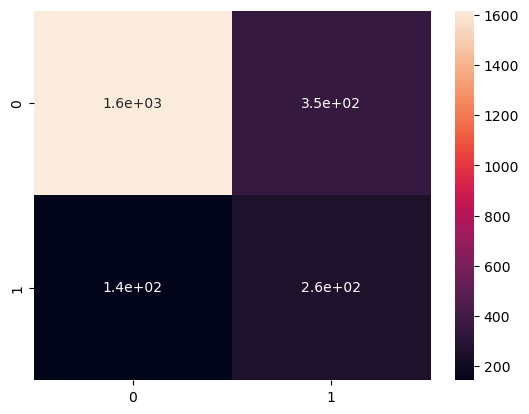

In [1360]:
sns.heatmap(cm, annot=True)
plt.show()

In [1362]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.82      0.87      1969
        >50K       0.42      0.64      0.51       400

    accuracy                           0.79      2369
   macro avg       0.67      0.73      0.69      2369
weighted avg       0.83      0.79      0.81      2369



In [1364]:
y_pred_train=gnb.predict(x_train)
y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [1366]:
pd.DataFrame(y_pred_train)

,0
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,>50K
...,...
9471,>50K
9472,<=50K
9473,<=50K
9474,>50K


In [1370]:
print(accuracy_score(y_train, y_pred_train))

0.8014985225833685


## Check Overfitting and underfitting

In [1375]:
print("trianing set score:{:.3f}".format(gnb.score(x_train, y_train)))
print("testing set score:{:.3f}".format(gnb.score(x_test, y_test)))

trianing set score:0.801
testing set score:0.791


## Calculating the class probability

In [1378]:
y_pred_proba = gnb.predict_proba(x_test)
y_pred_proba

array([[0.5157348 , 0.4842652 ],
       [0.99458495, 0.00541505],
       [0.26231581, 0.73768419],
       ...,
       [0.41208756, 0.58791244],
       [0.64945436, 0.35054564],
       [0.39208947, 0.60791053]])

In [1380]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.515735,0.484265
1,0.994585,0.005415
2,0.262316,0.737684
3,0.999689,0.000311
4,0.990103,0.009897
...,...,...
2364,0.994752,0.005248
2365,0.058692,0.941308
2366,0.412088,0.587912
2367,0.649454,0.350546


In [1382]:
y_pred_df=pd.DataFrame(data=y_pred_proba, columns=["Prob of >50k","Prob of <=50k"])
y_pred_df

,Prob of >50k,Prob of <=50k
0,0.515735,0.484265
1,0.994585,0.005415
2,0.262316,0.737684
3,0.999689,0.000311
4,0.990103,0.009897
...,...,...
2364,0.994752,0.005248
2365,0.058692,0.941308
2366,0.412088,0.587912
2367,0.649454,0.350546


In [1402]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(x_test)[:, 1]
y_pred1

array([0.4842652 , 0.00541505, 0.73768419, ..., 0.58791244, 0.35054564,
       0.60791053])

In [1406]:
pd.DataFrame(y_pred1)

,0
0,0.484265
1,0.005415
2,0.737684
3,0.000311
4,0.009897
...,...
2364,0.005248
2365,0.941308
2366,0.587912
2367,0.350546


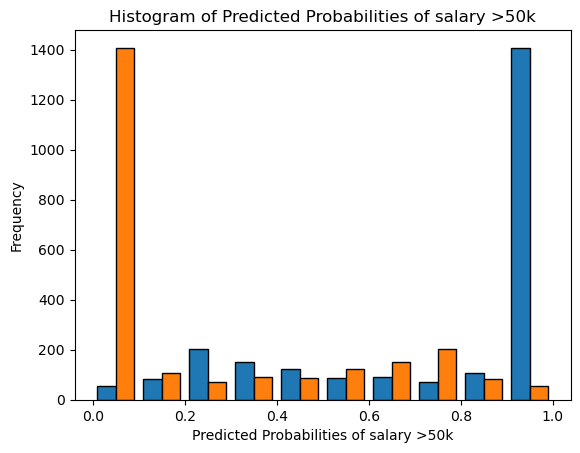

In [1416]:
plt.hist(y_pred_proba,bins=10, edgecolor="Black")
plt.title("Histogram of Predicted Probabilities of salary >50k")
plt.xlabel("Predicted Probabilities of salary >50k")
plt.ylabel("Frequency")
plt.show()

In [1420]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')
scores

array([0.81118143, 0.8185654 , 0.79008439, 0.7964135 , 0.78586498,
       0.78270042, 0.79408659, 0.78880676, 0.81837381, 0.81626188])

In [1422]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8002
